 # Preprocess data

In [35]:
import pandas as pd
data = pd.read_csv("../Data/spotify-2023.csv", encoding="latin-1")

data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Handle Missing Values

In [36]:
data.dropna(inplace=True)
data.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

Drop duplicate

In [37]:
data.drop_duplicates(subset="track_name", keep=False, inplace=True)

Normalize Data

In [38]:
from sklearn.preprocessing import StandardScaler
features = data[
    [
        "danceability_%",
        "valence_%",
        "energy_%",
        "acousticness_%",
        "instrumentalness_%",
        "liveness_%",
        "speechiness_%",
    ]
]

scaler = StandardScaler()


normalized_features = scaler.fit_transform(features)

normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns)

data.update(normalized_features_df)

data.rename(columns=lambda x: x.replace("_%", ""), inplace=True)

data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,0.855485,1.600383,1.156269,0.183249,-0.188613,-0.745049,-0.642445
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,0.243821,0.415148,0.596223,-0.763120,-0.188613,-0.597813,-0.642445
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,-1.115432,-0.812417,-0.710551,-0.368799,-0.188613,0.948161,-0.447728
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,-0.843581,0.288158,0.471768,-0.605392,-0.188613,-0.524196,0.428498
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,-0.163955,-1.193386,0.969587,-0.487095,6.976580,-0.524196,-0.447728


Export Cleaned Data

In [39]:
data.to_csv("../Data/spotify-2023-clean.csv", index=False)

# Recommendation systems

Import data cleaned

In [40]:
import pandas as pd
data = pd.read_csv("../Data/spotify-2023-clean.csv")
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,0.855485,1.600383,1.156269,0.183249,-0.188613,-0.745049,-0.642445
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,0.243821,0.415148,0.596223,-0.763120,-0.188613,-0.597813,-0.642445
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,-1.115432,-0.812417,-0.710551,-0.368799,-0.188613,0.948161,-0.447728
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,-0.843581,0.288158,0.471768,-0.605392,-0.188613,-0.524196,0.428498
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,-0.163955,-1.193386,0.969587,-0.487095,6.976580,-0.524196,-0.447728


## Fetch Playlists from Spotify

In [41]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from dotenv import load_dotenv
import os


load_dotenv()

# Set up Spotify API credentials
client_id = os.getenv("SPOTIPY_CLIENT_ID")
client_secret = os.getenv("SPOTIPY_CLIENT_SECRET")

spotify = spotipy.Spotify(
    client_credentials_manager=SpotifyClientCredentials(client_id, client_secret)
)


# Function to fetch playlist tracks
def get_playlist_tracks(playlist_id):
    results = spotify.playlist_tracks(playlist_id)
    tracks = results["items"]
    while results["next"]:
        results = spotify.next(results)
        tracks.extend(results["items"])
    return tracks


# Example playlist ID (replace with your desired playlist ID)
playlist_id = "5EH902vV2mzzqBYxWjnuQi"
tracks = get_playlist_tracks(playlist_id)

# Extract relevant information
track_data = []
for item in tracks:
    track = item["track"]
    track_info = {
        "track_name": track["name"],
        "artist_name": ", ".join([artist["name"] for artist in track["artists"]]),
        "track_id": track["id"],
    }
    track_data.append(track_info)

# Convert to DataFrame
playlist_df = pd.DataFrame(track_data)
playlist_df.head()

,track_name,artist_name,track_id
0,It's You,Ali Gatie,5DqdesEfbRyOlSS3Tf6c29
1,Get You The Moon (feat. Snøw),"Kina, Snøw",4ZLzoOkj0MPWrTLvooIuaa
2,If the World Was Ending (feat. Julia Michaels),"JP Saxe, Julia Michaels",77MdvMx9L4ZQuLhhn3o21h
3,Moonlight,Ali Gatie,6L4F4btXioJPhEwz6T7YYt
4,Can We Kiss Forever?,"Kina, Adriana Proenza",58wyJLv6yH1La9NIZPl3ne


Fetch Audio Features

In [42]:
# Function to fetch audio features
def get_audio_features(track_ids):
    features = spotify.audio_features(track_ids)
    return features


# Fetch audio features for tracks in the playlist
track_ids = playlist_df["track_id"].tolist()

audio_features = get_audio_features(track_ids)

# Convert audio features to DataFrame
audio_features_df = pd.DataFrame(audio_features)


# # Merge audio features with playlist data
playlist_df = playlist_df.merge(
    audio_features_df, left_on="track_id", right_on="id", how="left"
)
playlist_df.head()

,track_name,artist_name,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,It's You,Ali Gatie,5DqdesEfbRyOlSS3Tf6c29,0.732,0.463,11,-6.972,0,0.0287,0.374,...,0.1940,0.3970,95.971,audio_features,5DqdesEfbRyOlSS3Tf6c29,spotify:track:5DqdesEfbRyOlSS3Tf6c29,https://api.spotify.com/v1/tracks/5DqdesEfbRyO...,https://api.spotify.com/v1/audio-analysis/5Dqd...,212607,4
1,It's You,Ali Gatie,5DqdesEfbRyOlSS3Tf6c29,0.732,0.463,11,-6.972,0,0.0287,0.374,...,0.1940,0.3970,95.971,audio_features,5DqdesEfbRyOlSS3Tf6c29,spotify:track:5DqdesEfbRyOlSS3Tf6c29,https://api.spotify.com/v1/tracks/5DqdesEfbRyO...,https://api.spotify.com/v1/audio-analysis/5Dqd...,212607,4
2,Get You The Moon (feat. Snøw),"Kina, Snøw",4ZLzoOkj0MPWrTLvooIuaa,0.498,0.235,1,-16.541,0,0.1880,0.720,...,0.1440,0.0895,118.917,audio_features,4ZLzoOkj0MPWrTLvooIuaa,spotify:track:4ZLzoOkj0MPWrTLvooIuaa,https://api.spotify.com/v1/tracks/4ZLzoOkj0MPW...,https://api.spotify.com/v1/audio-analysis/4ZLz...,179080,4
3,If the World Was Ending (feat. Julia Michaels),"JP Saxe, Julia Michaels",77MdvMx9L4ZQuLhhn3o21h,0.429,0.486,1,-9.971,1,0.1010,0.866,...,0.0982,0.6610,146.990,audio_features,77MdvMx9L4ZQuLhhn3o21h,spotify:track:77MdvMx9L4ZQuLhhn3o21h,https://api.spotify.com/v1/tracks/77MdvMx9L4ZQ...,https://api.spotify.com/v1/audio-analysis/77Md...,209493,4
4,Moonlight,Ali Gatie,6L4F4btXioJPhEwz6T7YYt,0.804,0.480,11,-6.662,1,0.0321,0.495,...,0.1050,0.4610,120.002,audio_features,6L4F4btXioJPhEwz6T7YYt,spotify:track:6L4F4btXioJPhEwz6T7YYt,https://api.spotify.com/v1/tracks/6L4F4btXioJP...,https://api.spotify.com/v1/audio-analysis/6L4F...,228854,4


# Define the KNN Algorithm

Scaling Data

In [43]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for KNN
features = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
]

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(data[features])

Dimensionality Reduction

In [44]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)  
reduced_features = pca.fit_transform(normalized_features)

Determine the Most Optimal Number of Clusters

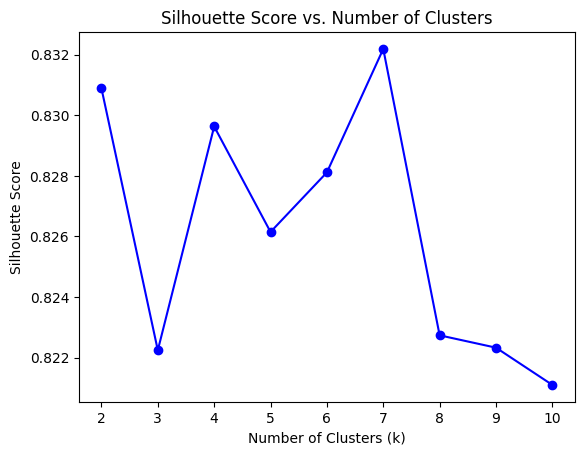

Optimal number of clusters (k): 7


In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
# Range of k values to evaluate
k_values = range(2, 11)  # Try k values from 2 to 10

# Evaluate each k value using Silhouette Score
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_features)
    silhouette_avg = silhouette_score(normalized_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score vs. Number of Clusters (k)
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, "bo-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()


optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (k): {optimal_k}")

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

features = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
]

data_selected_features = data[features]  
scaler = StandardScaler()
data_normalized_features = scaler.fit_transform(data_selected_features)

user_liked_songs = playlist_df[features]  
user_average_feature = np.mean(user_liked_songs, axis=0)


def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


def knn(train_features, test_feature, k):
    distances = []
    for i in range(len(train_features)):
        distance = euclidean_distance(train_features[i], test_feature)
        distances.append((distance, i))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    return [neighbor[1] for neighbor in neighbors]





Recommendation Based on Search Results

In [47]:
def recommend_based_on_liked_songs(data, user_liked_songs, features, k):
    # Select relevant features from the dataset
    data_selected_features = data[features]

    scaler = StandardScaler()
    data_normalized_features = scaler.fit_transform(data_selected_features)

    user_average_feature = np.mean(user_liked_songs, axis=0)

    recommended_song_indices = knn(data_normalized_features, user_average_feature, k)

    recommended_songs_details = data.iloc[recommended_song_indices][
        ["track_name", "artist(s)_name"]
    ]

    return recommended_songs_details

k = optimal_k

recommended_songs_details = recommend_based_on_liked_songs(
    data, user_liked_songs, features, k
)



print("Recommended Playlist:")
recommended_songs_details[["track_name", "artist(s)_name"]]

Recommended Playlist:


,track_name,artist(s)_name
307,ýýý98 Braves,Morgan Wallen
271,Something in the Orange,Zach Bryan
190,Snow On The Beach (feat. More Lana Del Rey),"Lana Del Rey, Taylor Swift"
175,Self Love (Spider-Man: Across the Spider-Verse...,"Metro Boomin, Coi Leray"
591,Freaky Deaky,"Tyga, Doja Cat"
256,Sunroof,"Nicky Youre, Dazy"
195,Hummingbird (Metro Boomin & James Blake),"James Blake, Metro Boomin"


recommend_based_on_search_query

In [48]:
def recommend_based_on_search_query(data, features, k, search_query):
    data_selected_features = data[features]

    scaler = StandardScaler()
    data_normalized_features = scaler.fit_transform(data_selected_features)

    matching_indices = find_matching_indices(data, search_query)

    if len(matching_indices) == 0:
        print("No songs found matching the query.")
        return None

    matching_songs_features = data_normalized_features[matching_indices]
    avg_matching_features = np.mean(matching_songs_features, axis=0)

    recommended_song_indices = knn(data_normalized_features, avg_matching_features, k)

    recommended_songs_details = data.iloc[recommended_song_indices][
        ["track_name", "artist(s)_name"]
    ]

    return recommended_songs_details


def find_matching_indices(data, search_query):
    matching_indices = []

    for index, row in data.iterrows():
        track_name = row["track_name"].lower()
        artist_name = row["artist(s)_name"].lower()

        if search_query.lower() in track_name or search_query.lower() in artist_name:
            matching_indices.append(index)

    return matching_indices

k = optimal_k

search_query = "LALA"


recommended_songs_search = recommend_based_on_search_query(
    data, features, k, search_query
)


print("Recommended Playlist:")
recommended_songs_search[["track_name", "artist(s)_name"], ]

Recommended Playlist:


,track_name,artist(s)_name
1,LALA,Myke Towers
122,Novo Balanï¿½,"Veigh, Bvga Beatz, Supernova Ent, Prod Malax"
260,People Pt.2 (feat. IU),"IU, Agust D"
282,Say You Won't Let Go,James Arthur
372,"You're On Your Own, Kid",Taylor Swift
429,Dawn FM,The Weeknd
78,Donï¿½ï¿½ï¿½t Bl,Taylor Swift


In [49]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv("../Data/spotify-2023-clean.csv")

# Define the features
features = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on your dataset
scaler.fit(data[features])

# Pickle the scaler object
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [50]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os

# Load environment variables
from dotenv import load_dotenv

load_dotenv()


class SpotifyRecommendationSystem:
    def __init__(self):
        self.loaded_scaler = self.load_scaler()
        self.data = self.load_data()
        self.features = [
            "danceability",
            "energy",
            "speechiness",
            "acousticness",
            "instrumentalness",
            "liveness",
            "valence",
        ]
        self.spotify = self.setup_spotify()

    def load_scaler(self):
        with open("scaler.pkl", "rb") as scaler_file:
            return pickle.load(scaler_file)

    def load_data(self):
        return pd.read_csv("../Data/spotify-2023-clean.csv")

    def setup_spotify(self):
        client_id = os.getenv("SPOTIPY_CLIENT_ID")
        client_secret = os.getenv("SPOTIPY_CLIENT_SECRET")
        return spotipy.Spotify(
            client_credentials_manager=SpotifyClientCredentials(
                client_id, client_secret
            )
        )

    def get_playlist_tracks(self, playlist_id):
        results = self.spotify.playlist_tracks(playlist_id)
        tracks = results["items"]
        while results["next"]:
            results = self.spotify.next(results)
            tracks.extend(results["items"])
        return tracks

    def get_audio_features(self, track_ids):
        features = self.spotify.audio_features(track_ids)
        return features

    def recommend_songs(self, user_liked_songs, k):
        data_selected_features = self.data[self.features]
        data_normalized_features = self.loaded_scaler.transform(data_selected_features)
        user_liked_songs_normalized = self.loaded_scaler.transform(user_liked_songs)

        user_average_feature = np.mean(user_liked_songs_normalized, axis=0)

        def euclidean_distance(point1, point2):
            return np.sqrt(np.sum((point1 - point2) ** 2))

        def knn(train_features, test_feature, k):
            distances = []
            for i in range(len(train_features)):
                distance = euclidean_distance(train_features[i], test_feature)
                distances.append((distance, i))
            distances.sort(key=lambda x: x[0])
            neighbors = distances[:k]
            return [neighbor[1] for neighbor in neighbors]

        recommended_song_indices = knn(
            data_normalized_features, user_average_feature, k
        )
        recommended_songs_details = self.data.iloc[recommended_song_indices][
            ["track_name", "artist(s)_name"]
        ]
        return recommended_songs_details

    def run_recommendation(self, playlist_id, k):
        tracks = self.get_playlist_tracks(playlist_id)
        track_ids = [
            item["track"]["id"] for item in tracks if item["track"]["id"] is not None
        ]
        audio_features = self.get_audio_features(track_ids)
        audio_features_df = pd.DataFrame(audio_features)

        if not audio_features_df.empty and set(self.features).issubset(
            audio_features_df.columns
        ):
            user_liked_songs = audio_features_df[self.features].values
            return self.recommend_songs(user_liked_songs, k)
        else:
            return None


# Create an instance of the SpotifyRecommendationSystem
spotify_rs = SpotifyRecommendationSystem()

# Pickle the instance
with open("spotify_recommendation_system.pkl", "wb") as f:
    pickle.dump(spotify_rs, f)